# 실시간 비명 감지 시스템

## 소리 데이터에 대한 이해

### Library Import

In [1]:
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd

### 예제파일

In [2]:
example_file_path = librosa.ex('trumpet')
print(example_file_path)

/home/ysher/.cache/librosa/sorohanro_-_solo-trumpet-06.ogg


### Amplitude 벡터 생성

In [3]:
y, sr = librosa.load(example_file_path) # y -> 소리의 Amplitude, sr -> sampling rate

In [4]:
sd.play(y) # 소리재생

PortAudioError: Error querying device -1

### 소리 벡터 출력

In [5]:
print(f"y : {y}\nsampleing_rate : {sr}")

y : [-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
sampleing_rate : 22050


### 벡터 길이

In [6]:
print(f"y lenght : { len(y)}")

y lenght : 117601


### 벡터값 20개 출력

In [7]:
print(y[:20])

[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04  9.9920901e-05
  4.3150427e-05 -1.7485349e-04 -3.6783377e-04  1.4553138e-04
  5.0557830e-04  1.4929948e-03  1.8555219e-03  9.2913158e-04
 -4.0743878e-04 -2.0390339e-03 -1.2686776e-03 -5.3472776e-04
  8.9941407e-04  9.7593543e-04  1.0019976e-03 -1.2960718e-03]


### 시각화

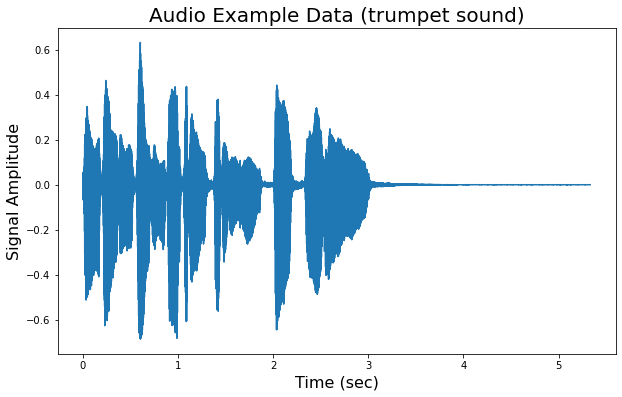

In [8]:
x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Audio Example Data (trumpet sound)", fontsize=20)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Signal Amplitude", fontsize=16)
plt.show()

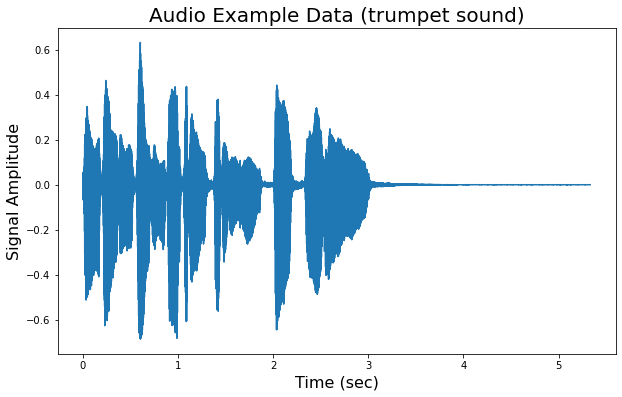

In [9]:
# x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Audio Example Data (trumpet sound)", fontsize=20)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Signal Amplitude", fontsize=16)
plt.show()

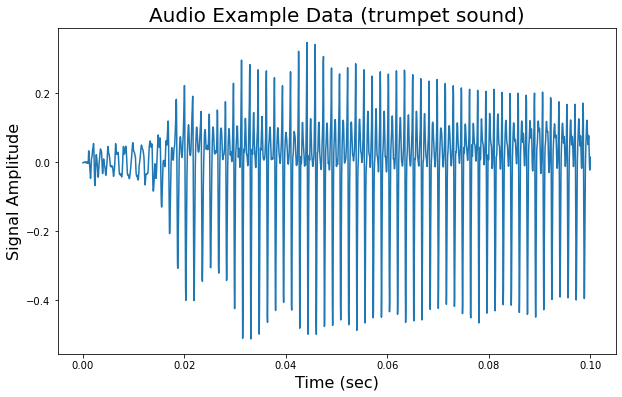

In [10]:
# x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10,6))
plt.plot(x[:sr//10], y[:sr//10])
plt.title("Audio Example Data (trumpet sound)", fontsize=20)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Signal Amplitude", fontsize=16)
plt.show()

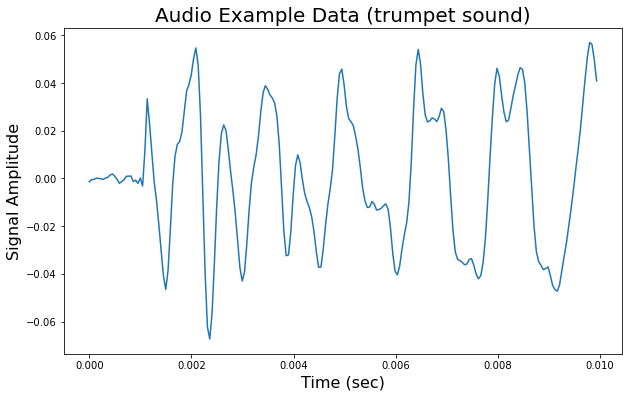

In [11]:
# x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10,6))
plt.plot(x[:sr//100], y[:sr//100])
plt.title("Audio Example Data (trumpet sound)", fontsize=20)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Signal Amplitude", fontsize=16)
plt.show()

### 데이터 불러오기

In [12]:
import pandas as pd
import librosa

In [13]:
example_file_path = '../data/sound_data/raw_data/_43hspkejjs.wav'
example_label_path = "../data/sound_data/labels/_43hspkejjs.txt"

In [14]:
example_audio, example_sr = librosa.load(example_file_path)
print(f"audio length : {len(example_audio)}")
print(f"audio file length : {len(example_audio)/sr}")

audio length : 143325
audio file length : 6.5


In [15]:
example_label = pd.read_csv(example_label_path, sep="\t", names=["start(s)", "end(s)","label"])
print(f"label:\n{example_label}")

label:
   start(s)    end(s)  label
0  0.096571  1.344571      1
1  1.638000  3.302000      1


### Frame & Stride define

In [16]:
frame_size = 1
stride = 0.2

idx = example_label["end(s)"] - example_label["start(s)"] >= frame_size
example_label = example_label[idx]

### 레이블 별 frame 개수 및 총 frame 개수

In [17]:
import numpy as np
each_n_frames = np.floor(((example_label["end(s)"] - example_label["start(s)"]-frame_size)/stride)+1).astype(int).values
total_n_frames = sum(each_n_frames)

print(f"각각의 구간마다 프레임 개수 : {each_n_frames}")
print(f"총 구간의 프레임 개수 : {total_n_frames}")

각각의 구간마다 프레임 개수 : [2 4]
총 구간의 프레임 개수 : 6


### frame vector & target vector 담기 위함 빈 vector create

In [18]:
frame_vectors = np.zeros((int(total_n_frames), frame_size*sr)) # 음성 데이터
target_vectors = np.zeros((int(total_n_frames), 1))

print(
    f"frame_vectors shape : {frame_vectors.shape}\
    \ntarget_vectors shape : {target_vectors.shape}"
)

for i in range(len(frame_vectors)):
    print(f"{i}-th frame vector[:5] : {frame_vectors[i][:5]}")
    
print(f"target vectors : {target_vectors.reshape((-1))}")

frame_vectors shape : (6, 22050)    
target_vectors shape : (6, 1)
0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]
target vectors : [0. 0. 0. 0. 0. 0.]


### frame vector & target vector print

In [19]:
current_idx = 0
for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride)*sr)
        end_idx = start_idx + frame_size * sr
        frame_vectors[current_idx] = example_audio[start_idx:end_idx]
        target_vectors[current_idx] = y
        current_idx += 1

print(
    f"frame_vectors shape : {frame_vectors.shape}\
    \ntarget_vectors shape : {target_vectors.shape}"
)

for i in range(len(frame_vectors)):
    print(f"{i}-th frame vector[:5] : {frame_vectors[i][:5]}")
    
print(f"target vectors : {target_vectors.reshape((-1))}")

frame_vectors shape : (6, 22050)    
target_vectors shape : (6, 1)
0-th frame vector[:5] : [-0.00500048 -0.02125387 -0.02666542 -0.03086415 -0.03103494]
1-th frame vector[:5] : [-0.09051161 -0.19240791 -0.27751461 -0.31279689 -0.31109259]
2-th frame vector[:5] : [0.00049699 0.00062647 0.00072198 0.00081891 0.00094247]
3-th frame vector[:5] : [-0.14780837 -0.11056469 -0.06521149 -0.00362383  0.06854792]
4-th frame vector[:5] : [ 0.17916828  0.16158514  0.11667     0.0578206  -0.01303604]
5-th frame vector[:5] : [0.04435445 0.11816165 0.18006659 0.18912561 0.16040665]
target vectors : [1. 1. 1. 1. 1. 1.]


## feature extraction

- 진폭 데이터뿐 아니라 주파수등의 데이터가 필요하다.

- Mel Spectogram : 시간대별 각 주파수의 영엳대 크기값을 나타낸 feature

In [20]:
# 데이터 살펴보기
y = frame_vectors[1]
print(
    f"vector shape : {y.shape}\
    \nvector : \n{y}"
)

vector shape : (22050,)    
vector : 
[-0.09051161 -0.19240791 -0.27751461 ...  0.0667692   0.03831571
  0.00133288]


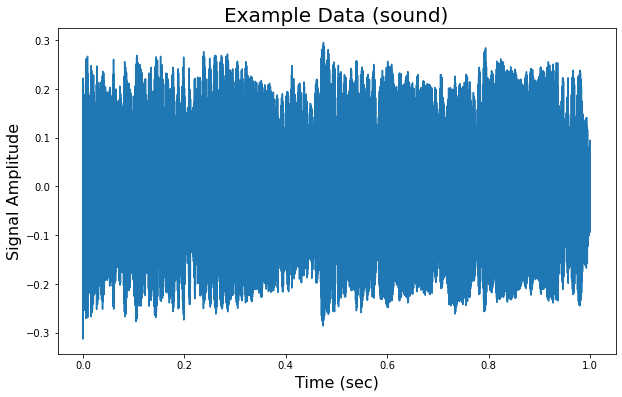

In [21]:
# 시각화

x = [t / sr for t in range(len(y))]

plt.figure(figsize = (10,6))
plt.plot(x,y)
plt.title("Example Data (sound)", fontsize=20)
plt.xlabel("Time (sec)", fontsize=16)
plt.ylabel("Signal Amplitude", fontsize=16)
plt.show()

### Mel spectrogram 추출 및 시각화

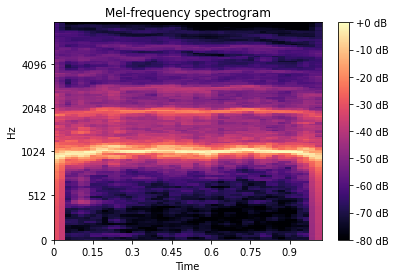

In [22]:
from librosa.display import specshow

S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [23]:
#데이터 차원변화
print(
    f"Before shape (signal) : {y.shape}\
    \nAfter shape (Mel Spectrogram) : {S_dB.shape}"
)

Before shape (signal) : (22050,)    
After shape (Mel Spectrogram) : (128, 44)


### 레이블 데이터 정리

In [24]:
from os import listdir
from os.path import join, splitext
import pandas as pd

In [25]:
# 레이블 파일 출력
label_path = "../data/sound_data/labels/"
label_files = [
    f for f in listdir(label_path)
    if splitext(join(label_path, f))[-1] == '.txt'
]

print(f"label file 목록 예시 : {label_files[:5]}")

label file 목록 예시 : ['bodham8ky7m.txt', 'ys58dc3h_ri.txt', 'gun6.txt', 'scream_4.txt', '트림+7+짦고+크게.txt']


In [26]:
# 레이블 정보 모음 파일 생성
list_file_fn = "../data/sound_data/file_list.xlsx"
with pd.ExcelWriter(list_file_fn) as writer:
    audio_names = []
    for i, file_name in enumerate(label_files):
        temp = pd.read_csv(label_path + file_name, sep="\t", header=None)
        temp.columns = ["start(s)", "end(s)","label"]
        temp.to_excel(writer, index=False, sheet_name=str(i))
        audio_names.append(file_name[:-3] + "wav")
        if i == len(label_files) - 1:
            pd.DataFrame(audio_names, columns=["audio_name"]).to_excel(writer, sheet_name="list")

### 전체 데이터 전처리

In [27]:
import time
import math

import numpy
import pandas as pd
from tqdm import tqdm

import librosa
from torch.utils.data import Dataset, DataLoader

In [28]:
# 데이터 로드 함수
def load_label_data(file_path, i , frame_name):
    audio_label=pd.read_excel(file_path, sheet_name = str(i))
    audio_label['label'] = audio_label['label'].apply(lambda x:int(str(x)[0]))
    audio_label = np.array(audio_label)
    audio_label = audio_label[(audio_label[:,1]) - audio_label[:,0] >= frame_size]
    return audio_label

In [29]:
def load_sound_data(file_path, sampling_rate):
    audio, sr = librosa.load(file_path, sr=sampling_rate)
    return audio, sr

### frame processing function

In [30]:
def process_frame(audio, sr, label, frame_size=1, stride=0.2):
    n = np.sum(np.floor(((label[:,1] - label[:,0])-frame_size)/stride+frame_size))
    frame_vector = np.zeros((int(n),frame_size*sr))
    target_vector = np.zeros((int(n),1))
    
    i = 0
    for temp_label in label:
        start = temp_label[0]
        end = temp_label[1]
        y = temp_label[2]
        
        eter = int(np.floor((((end-start)-frame_size)/stride)+1))
        for j in range(eter):
            start_idx = int((start + j*stride)*sr)
            end_idx = start_idx + frame_size*sr
            frame_vector[i] = audio[start_idx:end_idx]
            target_vector[i] = y
            i+=1
    return frame_vector, target_vector

### feature extraction function

In [66]:
def extract_mel_feature(frame_vector, sr, n_mels, st=512):
    mel_feature = librosa.feature.melspectrogram(
                        y = frame_vector, sr=sr, n_mels=n_mels, hop_length=st
                        )
    mel_feature = librosa.core.power_to_db(
                        mel_feature, ref=np.max
                        )
    return mel_feature

### 데이터에 대한 frame precessing 추출 수행

In [62]:
sr = 22050
frame_size = 1
stride = 0.2
n_mels = 64
n_feature = 34
short_time = 512

file_list = pd.read_excel("../data/sound_data/file_list.xlsx", sheet_name="list")

frame_vectors = []
label_vectors = []
idx_count = []

for file_i, file_name in enumerate(file_list['audio_name']):
    if file_i % 10 == 0:
        print(f"{file_i}-th 파일을 처리하고 있습니다.")
        
    label_data_temp = load_label_data("../data/sound_data/file_list.xlsx", file_i, frame_size)
    
    if len(label_data_temp) == 0:
        idx_count.append(0)
        continue
    
    audio_path = "../data/sound_data/raw_data/" + file_name
    audio_data_temp, _ = load_sound_data(audio_path, sr)
    frame_vector, label_vector = process_frame(
                                        audio=audio_data_temp, sr=sr, label=label_data_temp,frame_size=frame_size, stride=stride
                                    )
    frame_vectors.append(frame_vector)
    label_vectors.append(label_vector)
    
    idx_count.append(frame_vector.shape[0])
frame_vectors = np.concatenate(frame_vectors)
lebel_vectors = np.concatenate(label_vectors)

In [69]:
# frame vector를 mel septrogram으로 변환
mel_features = []
for frame_vector in frame_vectors:
    mel_feature = extract_mel_feature(frame_vector=frame_vector, sr=sr, n_mels=n_mels)
    mel_features.append(mel_feature)
mel_features = np.stack(mel_features)

In [55]:
y = label_vectors

In [56]:
# 데이터 개수 출력
print(f"y shape: {y.shape}\
\nscream count: {sum(y==1)}\
\nnon-scream count: {sum(y==0)}")

y shape: (5994, 1)
scream count: [2237]
non-scream count: [3757]


## pytorch dataset & dataloader

- 하나의 파일에서 여러개의 데이터가 나왔기 때문에 파일 속성을 고려하여 train, test 한쪽에만 존재하도록 한다.

In [57]:
train_ratio = 0.7

total_n = frame_vectors.shape[0]
train_n = int(total_n * train_ratio)
train_idxes = np.random.choice(total_n,train_n,replace=True)
train_mask = np.zeros(shape=total_n, dtype=bool)
train_mask[train_idxes] = True

In [70]:
train_mel_features = mel_features[train_mask]
valid_mel_features = mel_features[~train_mask]

train_label_vectors = label_vectors[train_mask]
valid_label_vectors = label_vectors[~train_mask]

In [96]:
# dataset 커스텀 클래스
class ScreamDataset(Dataset):
    def __init__(self, x, y):
        self.audio_features = x
        self.labels = y
    
    def __len__(self):
        return len(self.audio_features)
    
    def __getitem__(self, idx):
        audio_feature = torch.FloatTensor(self.audio_features[idx])
        audio_feature = audio_feature.unsqueeze(0)
        label = self.labels[idx]
        return (audio_feature, label)

In [97]:
# dataset과 dataloader 구현
batch_size = 128
train_dataset = ScreamDataset(train_mel_features, train_label_vectors)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataset = ScreamDataset(valid_mel_features, valid_label_vectors)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

## pytorch 모델 구현

In [108]:
import torch
from torch import nn

device = torch.device('cuda')

model = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(64,1)),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout2d(p=0.3),
                nn.Conv2d(in_channels=32,out_channels=64, kernel_size=(1,9),stride=4),
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.Dropout2d(p=0.3),
                nn.Flatten(),
                nn.Linear(64*1*9,1)
        ).to(device)

### 모델 학습

In [109]:
from torch import optim
learning_rate = 0.001
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [114]:
from sklearn.metrics import f1_score, accuracy_score

n_epochs = 100
train_n = len(train_dataset)
valid_n = len(valid_dataset)

for e in range(1,n_epochs+1):
    train_loss = 0
    train_acc = 0
    train_f1_score = 0
    valid_loss = 0
    valid_acc = 0
    valid_f1_score = 0
    
    model.train()
    for audio_feature, label in train_loader:
        audio_feature = audio_feature.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        
        pred = model(audio_feature)
        
        loss = criterion(pred, label)
        loss.backward()
        optimizer.step()
        
        pred = torch.round(torch.sigmoid(pred))
        pred = pred.cpu().detach().numpy()
        label = label.cpu().detach().numpy()
        
        acc = accuracy_score(label, pred)
        f1 = f1_score(label, pred)
        
        n = len(label)
        train_loss += loss.item()*n
        train_acc += acc.item()*n
        train_f1_score += f1*n
    
    model.eval()
    with torch.no_grad():
        for audio_feature, label in valid_loader:
            audio_feature = audio_feature.to(device)
            label = label.to(device)
            
            pred = model(audio_feature)
            
            loss = criterion(pred, label)
            
            pred = torch.round(torch.sigmoid(pred))
            pred = pred.cpu().detach().numpy()
            label = label.cpu().detach().numpy()
            
            acc = accuracy_score(label, pred)
            f1 = f1_score(label, pred)

            n = len(label)
            valid_loss += loss.item()*n
            valid_acc += acc.item()*n
            valid_f1_score += f1*n
    
    train_loss = f"{train_loss/train_n : .4f}"
    train_acc = f"{train_acc/train_n : .3f}"
    train_f1_score = f"{train_f1_score/train_n : .3f}"
    valid_loss = f"{valid_loss/train_n : .4f}"
    valid_acc = f"{valid_acc/train_n : .3f}"
    valid_f1_score = f"{valid_f1_score/train_n : .3f}"
    
    print(f"Epoch {e+0 : 03}")
    print("       |  loss  |  acc  |  f1  |")
    print(f" TRAIN | {train_loss} | {train_acc} | {train_f1_score} |")
    print(f" VAILD | {valid_loss} | {valid_acc} | {valid_f1_score} |")

Epoch  01
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1651 |  0.935 |  0.911 |
 VAILD |  0.2294 |  0.881 |  0.771 |
Epoch  02
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1499 |  0.939 |  0.914 |
 VAILD |  0.1897 |  0.901 |  0.765 |
Epoch  03
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1595 |  0.935 |  0.912 |
 VAILD |  0.1487 |  0.921 |  0.849 |
Epoch  04
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1581 |  0.940 |  0.917 |
 VAILD |  0.1626 |  0.917 |  0.843 |
Epoch  05
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1507 |  0.941 |  0.918 |
 VAILD |  0.1480 |  0.918 |  0.849 |
Epoch  06
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1364 |  0.948 |  0.928 |
 VAILD |  0.1357 |  0.924 |  0.865 |
Epoch  07
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1365 |  0.946 |  0.927 |
 VAILD |  0.1917 |  0.905 |  0.829 |
Epoch  08
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1388 |  0.944 |  0.923 |
 VAILD |  0.1560 |  0.918 |  0.847 |
Epoch  09
       |  loss  |  acc  |  f1  |
 TRAIN |  0.1460 |  0